In [65]:
# 회귀
np.random.seed(1)
x_1 = np.random.rand(5)
x_2 = np.random.rand(5,1) # (5)는 1차원 배열이지만 (5,1)부터 2차원에 1열로 차원이 올라감. 1차원배열로 사용하는게 좋음
x_1

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01,
       1.46755891e-01])

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
#차트를 브라우저에 바로 볼 수 있도록. 안될경우엔 plt.show() 도 가능한듯

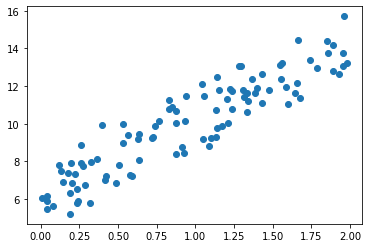

In [185]:
#단순 선형 회귀 데이터셋 만들어 산점도.
np.random.seed(0)
# y = 4x + 6을 근사(w0=6, w1=4). 
x = 2 * np.random.rand(100,1) #0~1의 수로 -> 행:100개, 열:1 개인 numpy배열
y = 6 + 4*x + np.random.randn(100,1) #노이즈를 위해 임의의 값 -1 ~ 1
plt.scatter(x,y)
# rand() 는 0~1 사이의 균일분포에서 난수를. 양수만
# randn()은 평균=0, 표준편차=1 인 표준정규분포에서 난수를 뽑으므로 음수도 가능

In [35]:
#내적의 결과는 선영씨에게 배운 것처럼 배열의 형태이지만 두 벡터가 1차원?이라면 각각 대응하는 위치별로 곱한것뿐

In [2]:
# 산점도 + 회귀선 
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names) #이상한? boston데이터를 df형태로
bostonDF['PRICE'] = boston.target #원본데이터에 타겟에 속하는 피처?가 있음 -> 우리가 y로 설정할 주택가격
bostonDF.shape 

(506, 14)

In [872]:
boston.target_names #없네?

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

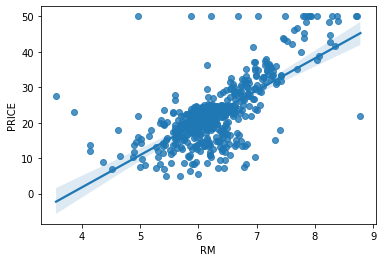

In [77]:
#단일 회귀. 'RM'만
bostonDF.head()
sns.regplot(x='RM', y='PRICE', data= bostonDF)

[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]]


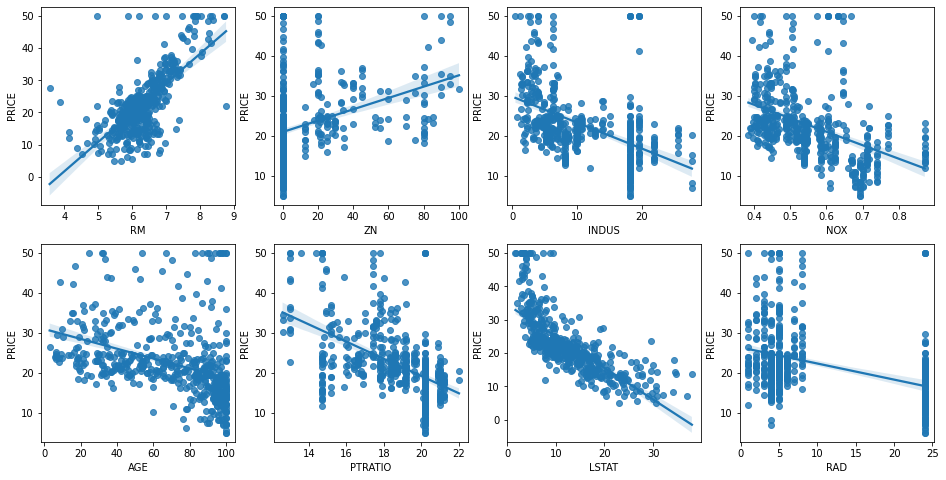

In [316]:
#반복문으로 8개 피처별 회귀 그래프 여러개 한번에 그려서 비교하기. 2x4 형태로 그래프 배열
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
print(axs) #넘파이 배열 4x2형태

lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features): # 1 :0~7
    row = int(i/4)
    col = i%4        #이거 생각한 사람 대단,,
    #regplot은 산점도와 회귀선을 같이 그려줌
    sns.regplot(x=feature, y='PRICE', data = bostonDF, ax =axs[row,col]) # x='컬럼명', y='컬럼명'

In [3]:
#x를 LSTAT 1개만 골라 단일회귀 절편,회귀계수 구하기
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
#데이터프레임형태에서 바로는 안되고, values로 넘파이형태로 바꾼 후 <<1열>> 형태로 .fit(x,y)에 넣을 수 있음
x=bostonDF['LSTAT'].values.reshape(-1,1)
y= bostonDF['PRICE'].values.reshape(-1,1)
lr.fit(x, y)
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: [34.55384088]
회귀 계수값: [[-1.]]


In [147]:
#test
bostonDF['RM'].values.reshape(-1,1)
#bostonDF.count()

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [874]:
### x가 여러개일때 절편, 회귀계수
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
y_target = bostonDF['PRICE']
x_data = bostonDF.drop('PRICE', axis=1, inplace = False)

# train : test = 8 : 2의 개수를 맞춤. 서로 겹치는 것 없이 모든 데이터 사용
x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size= 0.25) 
lr = LinearRegression()
lr.fit(x_train, y_train)

y_preds = lr.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
var = r2_score(y_test, y_preds)
print(f'MSE : {mse:0.3} , RMSE : {rmse:.3f}') #f가 있어도 없어도 ㄱㄴ? 
print(f'Variance score : {var:.4f}')

MSE : 17.8 , RMSE : 4.214
Variance score : 0.7248


In [212]:
#다중회귀의 절편과 회귀계수값 
print('절편 값:', lr.intercept_)
print('회귀계수 값:', np.round(lr.coef_, 1)) #왜 얘만 여러개인지는 잘,,,

절편 값: 33.976436335288156
회귀계수 값: [ -0.1   0.    0.1   1.7 -17.9   4.    0.   -1.4   0.3  -0.   -0.9   0.
  -0.5]


In [365]:
#test *넘파이 형태와 데이터프레임 형태 모두 train과 test로 분리가능
arr = [[1],[3],[5],[10],[30],[1000]]
train, test = train_test_split(arr, test_size=0.2)
print(test, train)

[[3], [30]] [[1], [5], [1000], [10]]


In [218]:
# 회귀계수와 컬럼명으로 두 줄의(1열) 시리즈 형태 제작
coef_ser = pd.Series(data=np.round(lr.coef_, 1), index= x_data.columns) #인덱스 없으면 번호 자동생성
coef_ser.sort_values(ascending = -1)

NOX       -17.9
DIS        -1.4
PTRATIO    -0.9
LSTAT      -0.5
CRIM       -0.1
ZN          0.0
AGE         0.0
TAX        -0.0
B           0.0
INDUS       0.1
RAD         0.3
CHAS        1.7
RM          4.0
dtype: float64

In [219]:
다항회귀가 선형회귀보다 무조건 좋은건지 서치 ㄱ

SyntaxError: invalid syntax (1755759020.py, line 1)

In [361]:
#test 랜덤
np.random.seed(0)
x=np.sort(np.random.rand(30))
print(x)

[0.0202184  0.07103606 0.0871293  0.11827443 0.14335329 0.38344152
 0.41466194 0.4236548  0.43758721 0.46147936 0.52184832 0.52889492
 0.54488318 0.5488135  0.56804456 0.60276338 0.63992102 0.64589411
 0.71518937 0.77815675 0.78052918 0.79172504 0.79915856 0.83261985
 0.87001215 0.891773   0.92559664 0.94466892 0.96366276 0.97861834]


In [1]:
@다항회귀.
다항회귀가 비선형회귀는 아님. y= w0 + w1x1 + w2x2 + w3x1x2 + w4(x1)^2 + w5(x2)^2 에서 회귀계수(기울기?) w는 1차이기때문,
독립변수 x의 차수로 비선형 선형을 나누진 않음

'\n다항회귀. but 다항회귀가 비선형회귀는 아님. y= w0 + w1x1 + w2x2 + w3x1x2 + w4(x1)^2 + w5(x2)^2 에서 회귀계수(기울기?) w는 1차이기\n에 독립변수 x의 차수로 비선형 선형을 나누진 않음'

In [191]:
# 2차 다항식 변환
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
x = np.arange(4).reshape(2,2) #임의의 단항식 생성
print(x)
# y=0 + x2인 [x1, x2] -> [1, x1, x2, x1^2 , x1x2 , x2^2] 이해X
poly = PolynomialFeatures(degree=2) 
poly.fit(x)
poly_ftr = poly.transform(x)
print(poly_ftr)


[[0 1]
 [2 3]]
[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [193]:
#test
poly_ftr[:,0]

array([1., 1.])

In [195]:
# x와 3차 y 생성
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y
x = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처: \n', x )
y = polynomial_func(x)
print('삼차 다항식 결정값: \n', y) # x의 한 행에 대응되는게 y

일차 단항식 계수 피처: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [210]:
#3차 다항식 변환
poly_ftr = PolynomialFeatures(degree =3).fit_transform(x)
print('3차 다항식 계수 피처:\n', poly_ftr)

#회귀계수 확인
model = LinearRegression().fit(poly_ftr,y) # x를 넣는게 아니라 x를 3차로 변환해서 넣음
print('회귀계수\n', np.round(model.coef_, 2))
print('회귀 shape\n', model.coef_.shape)

3차 다항식 계수 피처:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
회귀계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
회귀 shape
 (10,)



 Degree 1 회귀계수는 [-1.61] 입니다

Degree 1 MSE는 0.4077289625098685 입니다

 Degree 4 회귀계수는 [  0.47 -17.79  23.59  -7.26] 입니다

Degree 4 MSE는 0.04320874987232056 입니다

 Degree 15 회귀계수는 [-2.98291000e+03  1.03898880e+05 -1.87415324e+06  2.03715471e+07
 -1.44872830e+08  7.09313489e+08 -2.47065245e+09  6.24559902e+09
 -1.15676336e+10  1.56894743e+10 -1.54005873e+10  1.06457184e+10
 -4.91377255e+09  1.35919593e+09 -1.70380747e+08] 입니다

Degree 15 MSE는 181238260.14863485 입니다


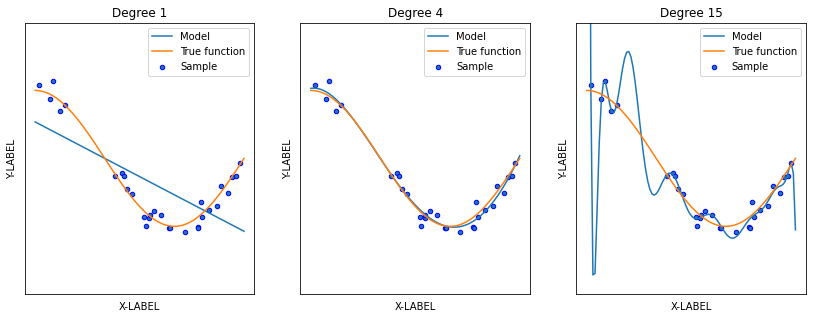

In [243]:
# 차수 1, 4, 15 별로 MSE 차이 검증
#데이터 생성
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

def true_fun(x):
    return np.cos(1.5 * np.pi * x)

np.random.seed(0)

X = np.sort(np.random.rand(30)) # 0~1 무작위
y = true_fun(X) + np.random.randn(30)*0.1 # 약간의 노이즈 추가 <- 평균=0, 표편 1인 정규분포 
        #------- 
plt.figure(figsize=(14,5))
degrees = [1, 4 , 15]

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1) #1행 3열 중 i+1번에 그리겠다
    plt.setp(ax, xticks =(), yticks=())
    
    x = X.reshape(-1, 1) #y는 (30,) 형태이지만 x는 (30,1) 형태로 1열로 꼭 맞춰줘야함

    # 차수와 회귀 한꺼번에 적용
    model = Pipeline([ ('poly', PolynomialFeatures(degree= degrees[i],include_bias=False)),
                    ('linear', LinearRegression()) ])
    model.fit(x, y) #?????
    
   #k-겹 교차검증 # 데이터를 10개(cv)의 세트로 나누어 하나씩 테스트-> 9개는 학습, 1개는 테스트 --> 리스트에 10개 데이터 생성됨
    scores = cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv= 10) 
    coefficients = model.named_steps['linear'].coef_ #pipeline의 구성 중 linear
    print('\n Degree {0} 회귀계수는 {1} 입니다'.format(degrees[i], np.round(coefficients, 2)))
    print('\nDegree {0} MSE는 {1} 입니다'.format(degrees[i], -1*np.mean(scores)))

    # 테스트 데이터 100개 생성
    X_test = np.linspace(0,1,100) #0~1 까지 100개로 같은 간격으로 나눔
    #예측값 곡선
    plt.plot(X_test, model.predict(X_test[:, np.newaxis]), label='Model')
    #실제값 곡선
    plt.plot(X_test, true_fun(X_test), '-', label='True function') # 노이즈 없는 가장 적합한 곡선 
    plt.scatter(X, y, edgecolor='b', s=20, label='Sample') # 점 -> 노이즈 포함된 실제 값 

    plt.xlabel('X-LABEL'); plt.ylabel('Y-LABEL');
    plt.ylim((-2,2)); plt.legend(loc='best');#우측 위 
    plt.title('Degree {}'.format(degrees[i]))

In [24]:
#랜덤 포레스트 회귀트리
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

boston = load_boston() #데이터 로드, data와 target으로 이루어짐 
#boston.target #boston.data
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
x_data = bostonDF.drop('PRICE', axis=1, inplace=False)

rf = RandomForestRegressor(random_state = 0, n_estimators=100) # 커질수록 오래걸림
neg_mse_scores = cross_val_score(rf, x_data, y_target, scoring ='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print('5 교차 검증의 개별 Negative MSE scores:',np.round(neg_mse_scores, 2))
print('5 교차 검증의 개별 RMSE scores:', np.round(rmse_scores, 2))
print(f'5 교차 검증의 평균 RMSE: {avg_rmse:0.3f}')

5 교차 검증의 개별 Negative MSE scores: [ -8.04 -13.58 -18.16 -47.62 -20.45]
5 교차 검증의 개별 RMSE scores: [2.84 3.68 4.26 6.9  4.52]
5 교차 검증의 평균 RMSE: 4.441


In [253]:
#!pip3 install cmake
#!pip3 install xgboost
!pip3 install lightgbm

In [867]:
#랜덤포레스트와 결정트리, GMB, XGBoost, LightGBM 의 회귀 모두 이용
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=100) #책에는 1000으로
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=100)
xgb_reg = XGBRegressor(n_estimators=100)
lgb_reg = LGBMRegressor(n_estimators=100)

models = [dt_reg, rf_reg ,gb_reg, xgb_reg, lgb_reg]
for model in models:
    neg_mse_scores = cross_val_score(model, x_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1* neg_mse_scores)
    avg_rmse = np.mean(rmse_scores) # 피처X의 각 rmse의 평균
    print('#####',model.__class__.__name__, '#####') #회귀모델명
    print(f'5교차 검증의 평균 RMSE : {avg_rmse:0.3}') 

##### DecisionTreeRegressor #####
5교차 검증의 평균 RMSE : 5.98
##### RandomForestRegressor #####
5교차 검증의 평균 RMSE : 4.44
##### GradientBoostingRegressor #####
5교차 검증의 평균 RMSE : 4.21
##### XGBRegressor #####
5교차 검증의 평균 RMSE : 4.25
##### LGBMRegressor #####
5교차 검증의 평균 RMSE : 4.57


array([3.00019821, 3.96560016, 4.26385902, 6.62939204, 4.99599567])

In [273]:
model.__class__

lightgbm.sklearn.LGBMRegressor

<AxesSubplot:>

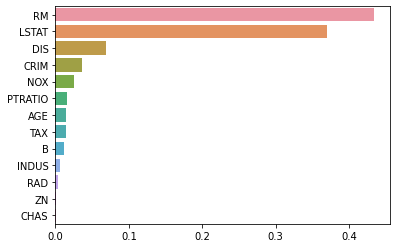

In [25]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=200)
rf_reg.fit(x_data, y_target)
#시리즈로 2열로 만듦
feature_series = pd.Series(data= rf_reg.feature_importances_, index= x_data.columns) #index는 각 행을 구분. columns와 다른 방향
#feature_series.values
feature_series=feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y= feature_series.index)

In [279]:
rf_reg.fit(x_data, y_target)
rf_reg.feature_importances_

array([0.04153644, 0.00112057, 0.00573639, 0.00097869, 0.02094906,
       0.45738599, 0.0121857 , 0.06516431, 0.00272993, 0.01516665,
       0.01599102, 0.01131311, 0.34974213])

In [299]:
#컬럼명 생성 ->데이터셋(?)에서는
boston.feature_names
#인덱스 생성 ->데이터프레임에서는
x_data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

(100, 2)


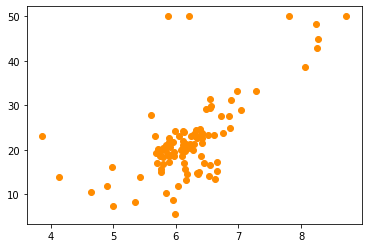

In [311]:
bostonDF_sample = bostonDF[['RM','PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100, random_state=0) #100개만 랜덤추출
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample['RM'], bostonDF_sample['PRICE'], c='darkorange')


In [319]:
#선형회귀 / 결정트리회귀 Depth =2, 7 로
lr_reg= LinearRegression()
lr_reg2 = DecisionTreeRegressor(max_depth=2)
lr_reg7 = DecisionTreeRegressor(max_depth=7)

#테스트 데이터 4.5~8.5까지 100개 생성
x_test = np.arange(4.5 , 8.5, 0.04).reshape(-1,1)

x_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target= bostonDF_sample['PRICE'].values#.reshape(-1,1)

#학습
lr_reg.fit(x_feature, y_target)
lr_reg2.fit(x_feature, y_target)
lr_reg7.fit(x_feature, y_target)
#테스트(예측)
pred_lr = lr_reg.predict(x_test)
pred_lr2 = lr_reg2.predict(x_test)
pred_lr7= lr_reg7.predict(x_test)

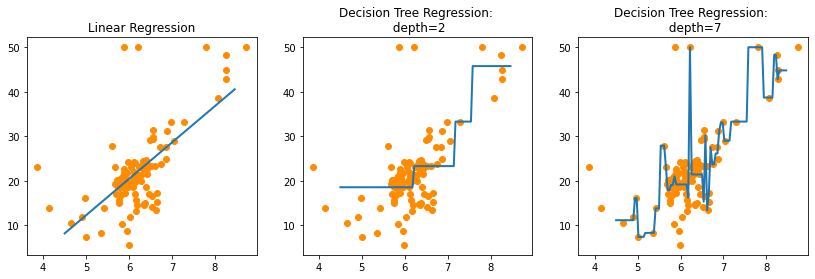

In [326]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3, nrows=1)

#선형회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample['RM'],bostonDF_sample['PRICE'], c='darkorange')
ax1.plot(x_test, pred_lr, label= 'linear', linewidth=2)


#결정트리회귀 예측선
ax2.set_title('Decision Tree Regression: \n depth=2')
ax2.scatter(bostonDF_sample['RM'],bostonDF_sample['PRICE'], c='darkorange')
ax2.plot(x_test, pred_lr2, label= 'Tree: max_depth=2', linewidth=2)

ax3.set_title('Decision Tree Regression: \n depth=7')
ax3.scatter(bostonDF_sample['RM'],bostonDF_sample['PRICE'], c='darkorange')
ax3.plot(x_test, pred_lr7, label= 'Tree: max_depth=7', linewidth=2) #이상치도 학습하면서 과적합 모델이 되어버림

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

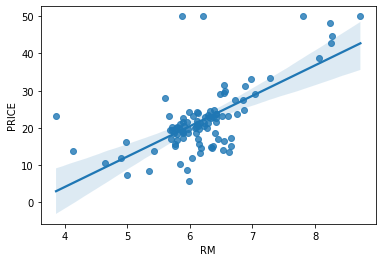

In [330]:
##test  regplot을 사용했을 때와 그냥 scatter + Linear,,,, 두 개를 합쳤을 때 결과가 같은..듯?
sns.regplot(x='RM', y='PRICE', data=bostonDF_sample)

In [ ]:
 <<회귀 실습 - 자전거 대여 수요 예측 363p>>

In [329]:
#현재 주피터 디렉토리(경로)
import os
print(os.getcwd())

C:\Users\000hj\Desktop\Analysis study


In [657]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

bike_df = pd.read_csv('bike_train.csv', encoding ='UTF-8')
print(bike_df.shape)
bike_df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [659]:
#인덱스 1부터 시작하게 변경
bike_df.index = bike_df.index+1
bike_df.index

RangeIndex(start=1, stop=10887, step=1)

In [389]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 1 to 10886
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [660]:
#'datetime' 컬럼을 년,월,일,시간으로 분리
bike_df['datetime'] = bike_df['datetime'].apply(pd.to_datetime) #판다스의 datetime과 컬럼명이 우연히 겹침
bike_df['datetime'].info() #데이터타입이 변경됨
bike_df['year'] = bike_df['datetime'].apply(lambda x: x.year) #시리즈 통째로는 year 속성을 뽑을 수 없음
bike_df['month'] = bike_df['datetime'].apply(lambda x: x.month)
bike_df['day'] = bike_df['datetime'].apply(lambda x: x.day)
bike_df['hour'] = bike_df['datetime'].apply(lambda x: x.hour) # 시 까지만 추출
bike_df.head()

<class 'pandas.core.series.Series'>
RangeIndex: 10886 entries, 1 to 10886
Series name: datetime
Non-Null Count  Dtype         
--------------  -----         
10886 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 85.2 KB


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
1,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
2,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
3,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
4,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
5,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [391]:
#컬럼 세 개 삭제
bike_df.drop(['datetime','casual','registered'], axis=1, inplace= True)

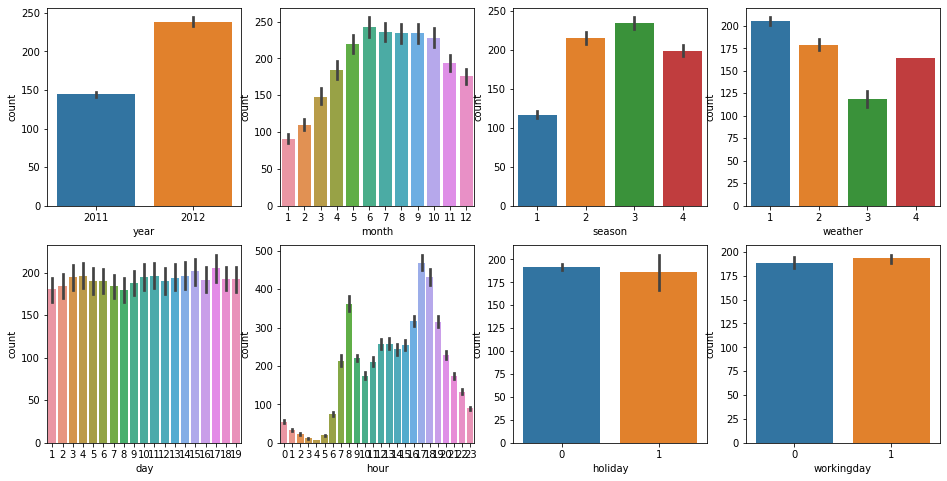

In [630]:
#타겟인 'count'컬럼에 대해 각 칼럼별로 그래프
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
cat_features = ['year','month','season','weather','day','hour','holiday','workingday']
for i, feature in enumerate(cat_features):
    row = i//4 # int(i/4)
    col = i%4
    sns.barplot(x=feature, y='count', data= bike_df, ax= axs[row][col])

In [631]:
#RMSLE (Root mean Square Log Error = (로그의 편차제곱 평균)에 루트), MSE RMSE 모두 평가
#RMSLE은 mean_squared_log_error(y, pred)에 루트를 씌워 구현할 경우 오버플로 혹은 언더플로가 발생하기 쉽기에 log1p, expm1사용. 나머지는 그냥 사용가능
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y, pred):
    return np.sqrt(mean_squared_error(y,pred))

def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    mae_val = mean_absolute_error(y, pred)
    print("RMSLE: {0:.3f}, RMSE: {1:.3f}, MAE: {2:.3f}".format(rmsle_val, rmse_val, mae_val))

In [632]:
#선형회귀의 RMSLE ,, ,, 구하기
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bike_df['count']
x_features = bike_df.drop('count', axis=1, inplace= False)

x_train,x_test, y_train,y_test = train_test_split(x_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression().fit(x_train, y_train)
pred = lr_reg.predict(x_test)

evaluate_regr(y_test, pred) #예측값과 실제값 차이가 큼

RMSLE: 1.165, RMSE: 140.900, MAE: 105.924


In [647]:
# y_test와 pred가 얼마나 차이났는지 오류값이 큰 순 5개 출력해서 확인
result_df = pd.DataFrame(y_test.values, columns=['real_count']) # values를 해야 이전의 인덱스, 컬럼명 관계없이 나옴
result_df['pred_count'] = np.round(pred)
result_df['diff'] = np.abs(result_df['real_count'] - result_df['pred_count']) #편차

result_df.sort_values('diff',ascending=False) #시리즈나 데이터프레임은 인덱스도 있으므로 sort_values로 숫자만.
# 568이면 예측 오류가 큼. --> target값에 왜곡이 있는지 확인

,real_count,pred_count,diff
243,6.357842,926.0,919.642158
2000,5.627621,901.0,895.372379
1042,6.329721,781.0,774.670279
1281,6.410175,757.0,750.589825
2175,6.442540,742.0,735.557460
...,...,...,...
1831,2.079442,3.0,0.920558
1718,1.386294,2.0,0.613706
2652,1.386294,2.0,0.613706
2527,1.609438,2.0,0.390562


<AxesSubplot:>

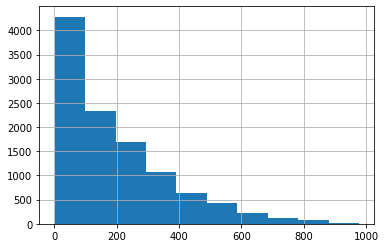

In [648]:
y_target.hist()

In [644]:
cnt_nump=y_target.values.reshape(-1,1)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

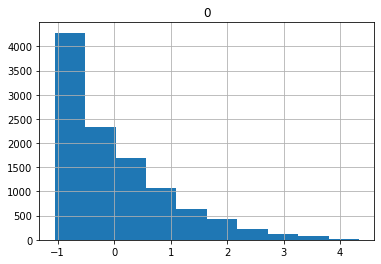

In [681]:
#표준화 --> 그대로 왜곡 남음
from sklearn.preprocessing import *

ss_data=StandardScaler().fit_transform(cnt_nump)
cnt_ser = pd.DataFrame(ss_data)
cnt_ser.hist()

<AxesSubplot:>

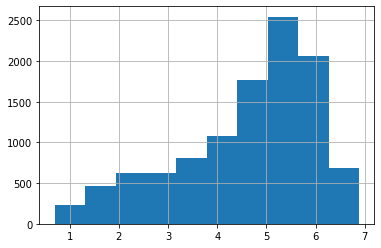

In [636]:
#로그변환 --> 원본 x축 count데이터 0~200 수치가 너무 많았는데 이를 퍼뜨려줌. 밑의 그래프를 보면 e^5 전후가 많음
y_log = np.log1p(y_target)
y_log.hist()

In [662]:
#로그변환한 데이터 가지고 평가 다시 수행
y_target_log = y_log
x_train, x_test, y_train, y_test = train_test_split(x_features, y_target_log, test_size=0.3, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(x_train, y_train)
pred = lr_reg.predict(x_test)

#타겟값과 예측값 적용 전, expm1으로 다시 스케일 변환
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)
#RMSLE은 줄고 다른건 더 커짐;

RMSLE: 1.017, RMSE: 162.594, MAE: 109.286


In [686]:
#일단 각 피처의 회귀 계숫값 시각화
coef = pd.Series(lr_reg.coef_, index= x_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index) #데이터는 x축 자리에 들어가는 coef_sort 뿐.

ValueError: Length of values (73) does not match length of index (12)

In [ ]:
"""<원-핫 인코딩> --- 트리에서는 상관없고 선형회귀 로지스틱,신경망 (숫자로 예측하는?) 등에서만 변환 필요 
<레이블인코딩>을 통해 'spring','summer',,, 계절을 데이터로 이용하기위해 1,2,3,4로 바꾸었다고 치면,
계절, 년도와 날짜 등은 연속형 숫자가 아니기에 1<2 이고, 1+2 = 3 의 관계가 아니므로 이를 서로 연관없는 개별의 피처로 만들어줌.

In [628]:
#판다스의 get_dumm,,, 로 year칼럼 뿐 아니라 다른 몇 가지를 원-핫 인코딩
x_features_ohe = pd.get_dummies(x_features, columns= ['year','month','day','hour','holiday','workingday','season','weather'])
x_features_ohe

,temp,atemp,humidity,windspeed,year_2011,year_2012,month_1,month_2,month_3,month_4,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
1,9.84,14.395,81,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
2,9.02,13.635,80,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
3,9.02,13.635,80,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
4,9.84,14.395,75,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
5,9.84,14.395,75,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10882,15.58,19.695,50,26.0027,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10883,14.76,17.425,57,15.0013,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10884,13.94,15.910,61,15.0013,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10885,13.94,17.425,61,6.0032,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [ ]:
"""원_핫 인코딩이 적용된 피처 데이터 세트 기반으로 재 학습
    선형회귀모델 3가지 """

In [607]:
# 1. 선형회귀
"""
x_train, x_test, y_train, y_test = train_test_split(x_features_ohe, y_target_log, test_size = 0.3, random_state=0)
lr_reg=  LinearRegression()
lr_reg.fit(x_train,y_train)  ##나머지 둘도 이 부분만 다름
pred = lr_reg.predict(x_test)

y_test = np.expm1(y_test)
pred = np.expm1(pred)
evaluate_regr(y_test, pred)"""

RMSLE: 0.590, RMSE: 97.687, MAE: 63.382


In [611]:
# 2. 릿지 회귀
"""
x_train, x_test, y_train, y_test = train_test_split(x_features_ohe, y_target_log, test_size = 0.3, random_state=0)

ridge_reg = Ridge(alpha=10).fit(x_train,y_train)
pred = ridge_reg.predict(x_test)

y_test = np.expm1(y_test)
pred = np.expm1(pred)
evaluate_regr(y_test, pred)"""

RMSLE: 0.590, RMSE: 98.529, MAE: 63.893


In [639]:
# 3. 라쏘회귀
"""
x_train, x_test, y_train, y_test = train_test_split(x_features_ohe, y_target_log, test_size = 0.3, random_state=0)

lasso_reg = Lasso(alpha=0.01).fit(x_train,y_train)
pred = lasso_reg.predict(x_test)

y_test = np.expm1(y_test)
pred = np.expm1(pred)
evaluate_regr(y_test, pred)"""

RMSLE: 0.635, RMSE: 113.219, MAE: 72.803


In [678]:
########## 위에 선형회귀 세 개 함수로 한 번에
x_train, x_test, y_train, y_test = train_test_split(x_features_ohe, y_target_log, test_size = 0.3, random_state=0)

def get_model(model, x_train,x_test,y_train,y_test, is_expm1=False):
    model.fit(x_train, y_train)
    pred =model.predict(x_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###', model.__class__.__name__,'##')
    evaluate_regr(y_test, pred)
    


lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha= 0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model(model,  x_train,x_test,y_train,y_test, is_expm1=True)

### LinearRegression ##
RMSLE: 0.590, RMSE: 97.687, MAE: 63.382
### Ridge ##
RMSLE: 0.590, RMSE: 98.529, MAE: 63.893
### Lasso ##
RMSLE: 0.635, RMSE: 113.219, MAE: 72.803


<AxesSubplot:>

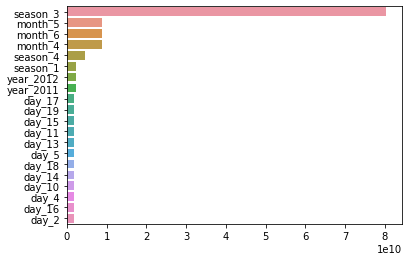

In [685]:
#원-핫 인코딩 적용 후 다시 선형회귀 계수     ※ 373p 결과가 다름
coef = pd.Series(lr_reg.coef_, index = x_features_ohe.columns)
coef_sort = coef.sort_values(ascending = False)[:20]
coef_sort
sns.barplot(x=coef_sort.values , y= coef_sort.index) #hist() 와의 차이?

In [651]:
"""회귀 트리모델 3가지 성능 평가"""

'회귀 트리모델 3가지로 위와 같이 성능 평가'

In [653]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf_reg = RandomForestRegressor(n_estimators=500) #많이 느리니 트리개수 줄이기
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)
                   #XGBoost의 경우 버전에 따라 오류가 발생할 수 있어 .values로 넘파이 형태로 넣어줌
for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    get_model(model, x_train.values, x_test.values, y_train.values, y_test.values, is_expm1=True)

### RandomForestRegressor ##
RMSLE: 0.355, RMSE: 50.362, MAE: 31.239
### GradientBoostingRegressor ##
RMSLE: 0.330, RMSE: 53.325, MAE: 32.733
### XGBRegressor ##
RMSLE: 0.342, RMSE: 51.732, MAE: 31.251
### LGBMRegressor ##
RMSLE: 0.319, RMSE: 47.215, MAE: 29.029


<AxesSubplot:xlabel='temp_intv', ylabel='count'>

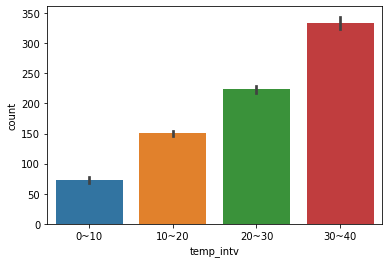

In [688]:
# my test - '온도'같이 연속형 데이터에 따른 count -> 연속형은 간격을 정해서 묶어야 할 거 같아서.. 판다스.unique사용
np.sort(pd.unique(bike_df['temp']))

bike_df['temp_intv'] =bike_df['temp'].apply(lambda x: '0~10' if x<10 else ('10~20' if x<20 else ('20~30' if x<30 else '30~40')))
sns.barplot(x='temp_intv', y='count', data= bike_df)

<AxesSubplot:xlabel='temp_intv', ylabel='count'>

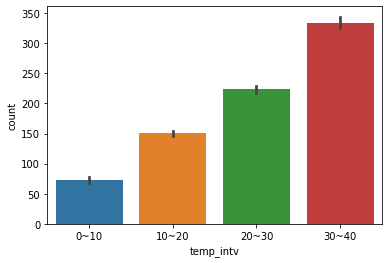

In [475]:
#test - temp컬럼 유니크한 데이터 개수
pd.unique(bike_df['temp'])
sns.barplot(x='temp_intv',y='count', data=bike_df) #여기서 y축은 count의 "평균치"이므로 적절하지 않은 그래프

In [464]:
bike_df['count'][bike_df['temp']>30].count()

1244

<AxesSubplot:xlabel='temp', ylabel='Density'>

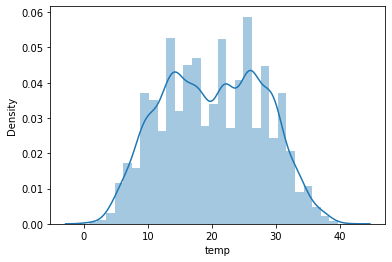

In [474]:
# temp를 일정 간격으로 묶어 몇 개의 행인지. (count는 관계 없이 데이터 수가 y축)
sns.distplot(bike_df['temp'], bins= 30) 

In [689]:
#원상복구
bike_df.drop('temp_intv', axis=1, inplace=True)

In [690]:
<< 회귀 실습 - 주택 가격 예측 375p>>

SyntaxError: invalid syntax (611726626.py, line 1)

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_df_origin = pd.read_csv('house_price.csv') #원본 데이터 남겨둠
house_df = house_df_origin.copy()
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [884]:
print(house_df.shape,'\n')
print(house_df.dtypes, '\n')   #-> 타켓을 제외한 80개 중 43개 피처가 문자형, 나머진 숫자
na_series= house_df.isnull().sum()
na_series[na_series > 0].sort_values(ascending =False) #널값 존재하는 피처 확인
house_df.drop(['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1, inplace =True) #널이 많거나 필요없는 컬럼 드랍

(1460, 81) 

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object 



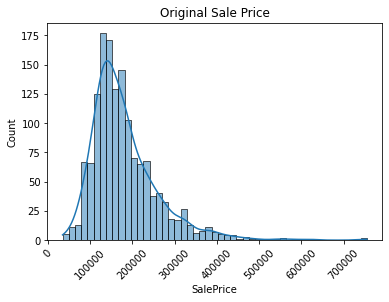

In [799]:
# 타겟값이 정규분포인지 확인 --> 아님
#house_df['SalePrice'].hist()
plt.title('Original Sale Price')
plt.xticks(rotation=45) #글자 45도
sns.histplot(house_df['SalePrice'], kde=True) 
plt.show()

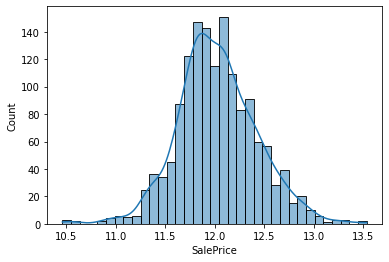

In [800]:
# 로그변환으로 정규화 --- log1p한 값으로 학습 후 예측시엔 expm1으로 환원하여 예측
log_SalePrice = np.log1p(house_df['SalePrice'])
sns.histplot(log_SalePrice, kde=True)
plt.show()

In [2]:
#SalePrice데이터를 log로 변환해서 바꿔줌
original_SalePrice = house_df['SalePrice'] #원본 남겨줌
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

In [880]:
#드랍하지 않은 숫자형 NULL 데이터는 평균값 삽입 --> 문자형컬럼은 건너뜀
house_df.fillna(house_df.mean(), inplace=True)

In [879]:
na_ser = house_df.isnull().sum() 
house_df[na_ser[na_ser>0].index].dtypes #널값이 존재하는 컬럼명을 찾아 데이터타입 확인

MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object

In [804]:
#이제 남은 문자열은 원-핫 인코딩을 하는데, 어차피 NULL은 0으로 바뀌기 때문에 신경X -> 1,0,0 이 정상이라면 0,0,0으로 변환됨
print('더미 수행 전 데이터:', house_df.shape)
house_df_ohe = pd.get_dummies(house_df)
print('더미 수행 후 데이터:', house_df_ohe.shape)

house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum()>0] #이제 널값은 없음

더미 수행 전 데이터: (1460, 75)
더미 수행 후 데이터: (1460, 271)


Series([], dtype: int64)

In [805]:
"""선형회귀모델 학습/예측/평가"""

'선형회귀모델 학습/예측/평가'

In [807]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, '로그 변환된 RMSE:', np.round(rmse,3))
    return rmse #실제 반환되는 결과값은 return

def get_rmses(models):   #get_rmse를 기반으로 여러 모델의 RMSE값을 모아서 반환
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [809]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis=1, inplace= False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

#선형,릿지,라쏘 학습 예측 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.132
Ridge 로그 변환된 RMSE: 0.128
Lasso 로그 변환된 RMSE: 0.176


[0.13189576579154041, 0.12750846334053037, 0.17628250556471403]

'피처가 너무 많으니 회귀 계수 값의 상위10개, 하위10개를 출력하는 함수로 영향있는 피처 확인'

In [837]:
"""피처가 너무 많으니 회귀 계수 값의 상위10개, 하위10개를 출력하는 함수로 영향있는 피처 확인"""
def get_top_bottom(model,n=10):
    coef = pd.Series(model.coef_, index= X_features.columns) #시리즈로 만들어 인덱스를 가지고 가야 나중에 컬럼명(인덱스) 같이 추출
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n) #끝 10개
    return coef_high, coef_low

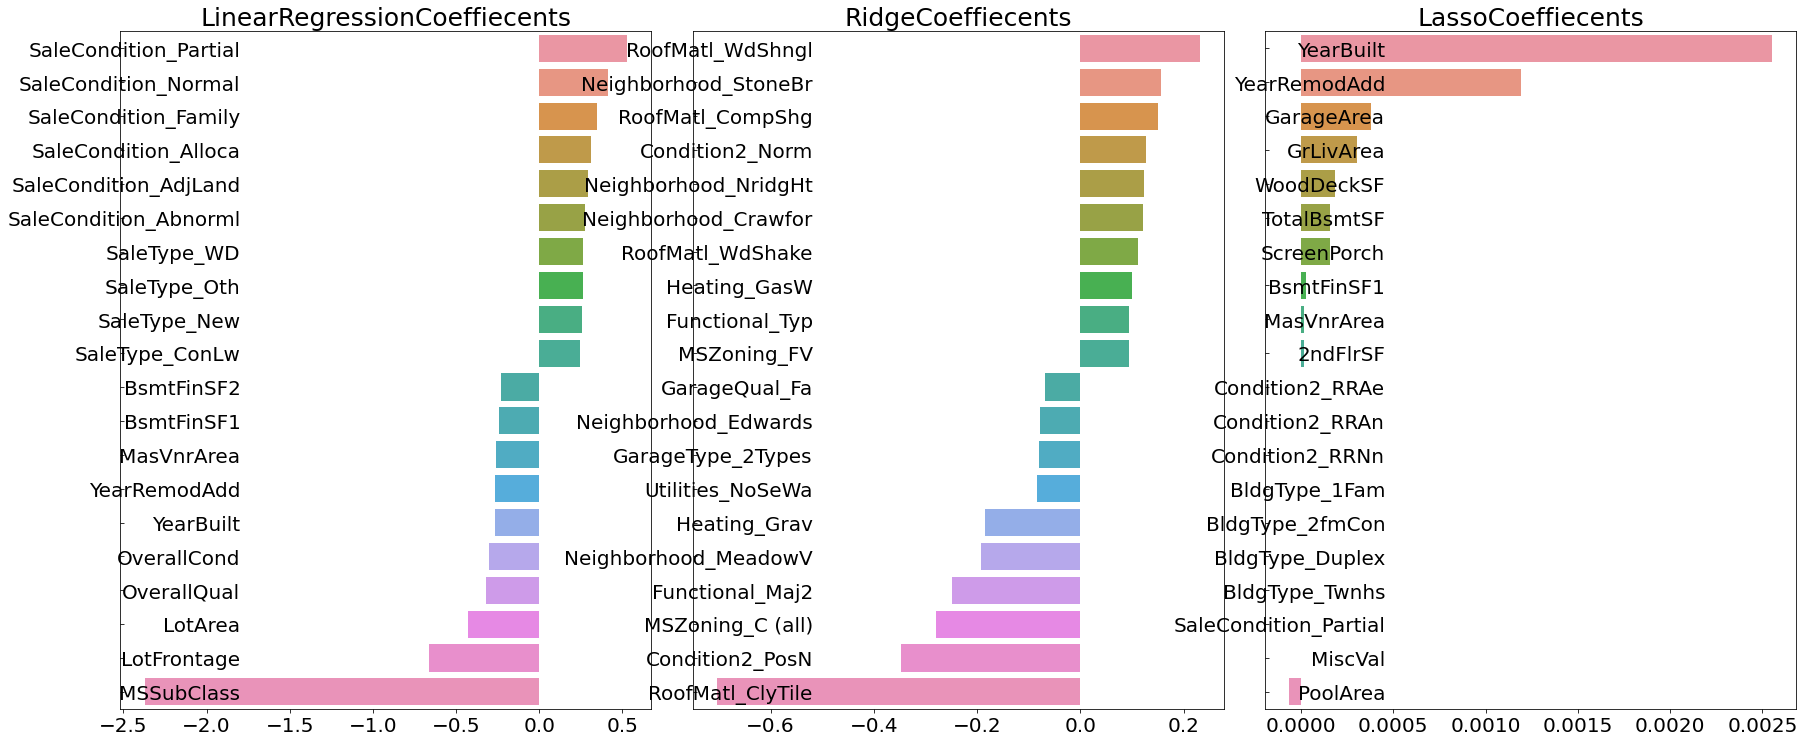

In [853]:
#3개 그래프
def visualize(models):
    fig, axs = plt.subplots(figsize=(24,10), nrows=1, ncols=3)
    fig.tight_layout()
    
    for i, model in enumerate(models):
        coef_high, coef_low = get_top_bottom(model)
        coef_concat = pd.concat([coef_high, coef_low]) #concat으로 결합
        
        axs[i].set_title(model.__class__.__name__ + 'Coeffiecents', size=25)
        axs[i].tick_params(axis="y", direction="in", pad=-120)
        for label in (axs[i].get_xticklabels() + axs[i].get_yticklabels()): 
            label.set_fontsize(20) ##x축 y축 레이블? 사이즈를 리스트 전체로 바꿀 수 없어서 for문으로 하나씩 뽑아온 듯
            #print(label)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax= axs[i]) # x, y를 바꿔놈

models = [lr_reg, ridge_reg, lasso_reg]
visualize(models)

In [854]:
"""나머지 둘에 비해 Lasso에서 너무 다른 계수값을 보이며 값이 너무 작음. 
데이터 분할이 문제일 수 있으니 train_test를 하지 않고 전체 데이터세트 X_features를 5개 교차 검증 세트로 분할해 RMSE측정해보자"""

'나머지 둘에 비해 Lasso에서 너무 다른 계수값을 보이며 값이 너무 작음. \n데이터 분할이 문제일 수 있으니 train_test를 하지 않고 전체 데이터세트 X_features를 5개 교차 검증 세트로 분할해 RMSE측정해보자'

In [857]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        rmse_lst =np.sqrt(-cross_val_score(model, X_features, y_target, scoring="neg_mean_squared_error", cv=5))
        rmse_avg = np.mean(rmse_lst)
        print('\n {0} CV RMSE 리스트: {1}'.format(model, rmse_lst))
        print('\n {0} CV 평균 RMSE값:{1}'.format(model, rmse_avg))
models = [ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


 Ridge() CV RMSE 리스트: [0.11725334 0.15439419 0.14208945 0.11652709 0.18898702]

 Ridge() CV 평균 RMSE값:0.14385021807917553

 Lasso() CV RMSE 리스트: [0.16077499 0.20437243 0.17676683 0.18127643 0.2651206 ]

 Lasso() CV 평균 RMSE값:0.19766225731814288


In [861]:
#릿지와 라쏘의 alpha값을 최적으로 조정하는 법 385p

In [862]:
# 타겟 뿐 아니라 피처에도 데이터 왜곡(그래프상 좌, 우측으로 치우침)이 있을 수 있으므로 왜곡이 큰 데이터만 로그변환!
#https://trading-for-chicken.tistory.com/m/149 --데이터 왜곡 설명 이해


In [863]:
#어려워uu포기..  트리로 예측도 뒤에 있음